In [5]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()

In [6]:
import matplotlib.pyplot as plt

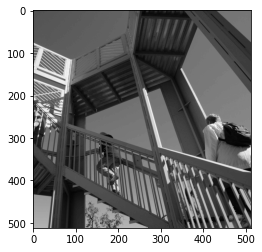

In [7]:
plt.grid(False)
plt.gray()
plt.axis('on')
plt.imshow(i)
plt.show()

In [8]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

In [9]:
#Experiment with different values for fun effects.
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

In [10]:
weight = 1

In [11]:
for x in range(1, size_x-1):
    for y in range(1, size_y-1):
        convolution = 0.0
        convolution += (i[x-1, y-1] * filter[0][0])
        convolution += (i[x, y-1] * filter[0][1])
        convolution += (i[x+1, y-1] * filter[0][2])
        convolution += (i[x-1, y] * filter[1][0])
        convolution += (i[x, y] * filter[1][1])
        convolution += (i[x+1, y] * filter[1][2])
        convolution += (i[x-1, y+1] * filter[2][0])
        convolution += (i[x, y+1] * filter[2][1])
        convolution += (i[x+1, y+1] * filter[2][2])
        convolution *= weight
        
        if(convolution < 0):
            convolution = 0
        if(convolution > 255):
            convolution = 255
        
        i_transformed[x, y] = convolution

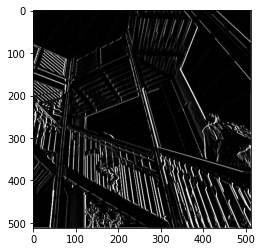

In [12]:
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
plt.show()

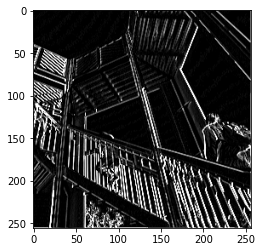

In [21]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
        pixels = []
        pixels.append(i_transformed[x, y])
        pixels.append(i_transformed[x+1, y])
        pixels.append(i_transformed[x, y+1])
        pixels.append(i_transformed[x+1, y+1])
        
        newImage[int(x/2),int(y/2)] = max(pixels)

plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()          